
## Activity 2 - Load Sensor Data
## Pandas

In [1]:
# import packages
import numpy as np
import pandas as pd
import math

In [2]:
df = pd.read_csv('dataset_1.txt', sep=',', header=None)  # use pandas to read csv file
print('The dataset contains %d rows.' % len(df)) 
df.head() # show first 5 rows of the dataset

The dataset contains 245576 rows.


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.092478,0.14400,-0.009739,231.24,42.410,181.19,-0.13840,-0.85828,0.101680,32.813,...,-6.607700,-15.092,38.214,-0.90671,-0.43698,-0.52616,-91.394,33.158,4.2875,1
1,0.057310,0.16003,-0.009739,238.56,51.564,174.59,-0.15410,-0.86636,0.069517,46.727,...,-5.143100,-18.021,37.482,-0.94272,-0.32132,-0.49881,-82.606,36.087,-1.5711,1
2,0.022143,0.18408,-0.038329,243.69,59.620,166.17,-0.15410,-0.89867,0.053434,57.346,...,-3.678400,-20.584,37.116,-0.92271,-0.21722,-0.46756,-75.283,37.552,-5.9651,1
3,-0.001302,0.20412,-0.030160,246.62,65.112,156.29,-0.16981,-0.90675,0.049414,65.768,...,-0.749080,-23.514,35.285,-0.89070,-0.13626,-0.45193,-69.424,37.552,-8.8945,1
4,-0.032562,0.20813,-0.026076,250.64,70.605,145.30,-0.16981,-0.90675,0.081579,69.063,...,-0.016749,-24.246,33.088,-0.89870,-0.10927,-0.48709,-63.566,39.017,-10.3590,1



## Activity 3 - Visualize Sensor Data
## Matplotlib

In [3]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [4]:
%matplotlib inline

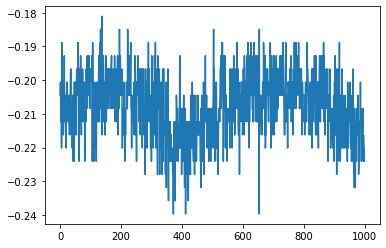

In [5]:
df_sitting = df[df[24] == 1].values 
plt.plot(df_sitting[500:1500, 0]) 

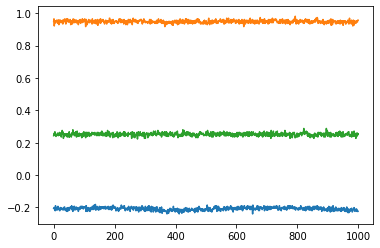

In [6]:
plt.plot(df_sitting[500:1500, 0:3]) # We could plot muliple lines in the same plot


## Activity 4 - Sensor Data Signal Processing
## Scipy 

For raw sensor data, it usually contains noise that arises from different sources, such as sensor mis
calibration, sensor errors, errors in sensor placement, or noisy environments. We could apply filter to remove noise of sensor data
to smooth data.

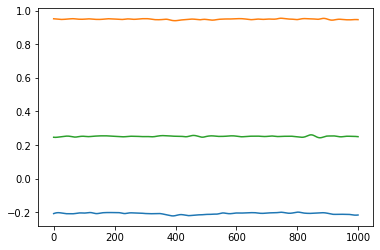

In [7]:
from scipy import signal

b, a = signal.butter(4, 0.04, 'lowpass', analog=False)
for i in range(3):
    df_sitting[:,i] = signal.lfilter(b, a, df_sitting[:, i])
plt.plot(df_sitting[500:1500, 0:3])


## Activity 5:  Feature Engineering
## Numpy 

For time series data, we should convert the raw dataset to feature dataset, where each data sample contains features extracted from a period of time. For example, in the last cell we plot the period of time from 500 to 1500. Now we can consider it as a segmentation and extract statistic features from it. In this tutorial, we extract min value and max value of accelerometer data of wrist sensor as features. In data visualization we could find that for different activities the sensor signal data values are in different ranges. Therefore, we could think that we could recognize different activities by the range of data, which means minimum and maximum values of data may be useful features to recognize activities.     

In [8]:
seg = df_sitting[500:1500, 0:]
a1_min = np.min(seg[:, 0])
a1_max = np.max(seg[:, 0])
a2_min = np.min(seg[:, 1])
a2_max = np.max(seg[:, 1])
a3_min = np.min(seg[:, 2])
a3_max = np.max(seg[:, 2])
print([a1_min, a1_max, a2_min, a2_max, a3_min, a3_max, int(seg[0, 24])])

[-0.22194265347765907, -0.19935836657775846, 0.9402283561068766, 0.9548131625613635, 0.2432672903705879, 0.2607813895652679, 1]


for each accelerometer axis data of the first senosr in the period, we extract 2 statistic feature min and max value. Now the data segmentation for activity sitting is represented the (1 * 7) vector. The first six numbers are features and the last number is the label.  